In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
df_data = pd.read_table("processed.cleveland.data", 
                        sep=',', 
                        names=["age","sex","cp","trestbps","chol","fbs","restecg",
                               "thalach","exang","oldpeak","slope","ca","thal","num"])


In [3]:
missingLst = []
for col in df_data.columns:
    count = sum(pd.isnull(df_data[col])) + sum(df_data[col].isin(["?"]))
    if  count != 0: 
        missingLst.append({"col": col, "countOfMissing": sum(df_data[col].isin(["?"])), "countOfNaN": sum(pd.isnull(df_data[col]))})
missingLst

[{'col': 'ca', 'countOfMissing': 4, 'countOfNaN': 0},
 {'col': 'thal', 'countOfMissing': 2, 'countOfNaN': 0}]

In [4]:
modeOfCa = df_data["ca"].mode()[0]
modeOfThal = df_data["thal"].mode()[0]

In [5]:
df_data["ca"] = df_data["ca"].replace("?", modeOfCa)
df_data["thal"] = df_data["thal"].replace("?", modeOfThal)

In [6]:
df_dataToNumeric = df_data.copy()
df_dataToNumeric

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [7]:
print(sorted(df_dataToNumeric.num.unique()))
df_dataToNumeric.num.value_counts()

[0, 1, 2, 3, 4]


0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [8]:
df_data.ix[df_data.num > 0, 'num']= 1
df_dataToNumeric_twoClass = df_data.copy()
print(df_dataToNumeric_twoClass.num.value_counts())
df_dataToNumeric_twoClass

0    164
1    139
Name: num, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [9]:
df_data["cp"] = df_data["cp"].replace(1.0, "typical angina")
df_data["cp"] = df_data["cp"].replace(2.0, "atypical angina")
df_data["cp"] = df_data["cp"].replace(3.0, "non-anginal pain")
df_data["cp"] = df_data["cp"].replace(4.0, "asymptomatic")

In [10]:
df_data["restecg"] = df_data["restecg"].replace(0.0, "normal")
df_data["restecg"] = df_data["restecg"].replace(1.0, "ST-T wave abnormality")
df_data["restecg"] = df_data["restecg"].replace(2.0, "hypertrophy")

In [11]:
df_data["slope"] = df_data["slope"].replace(1.0, "upsloping")
df_data["slope"] = df_data["slope"].replace(2.0, "flat")
df_data["slope"] = df_data["slope"].replace(3.0, "downsloping")

In [12]:
df_data["thal"] = df_data["thal"].replace(3.0, "normal")
df_data["thal"] = df_data["thal"].replace(6.0, "fixed defect")
df_data["thal"] = df_data["thal"].replace(7.0, "reversable defect")

In [13]:
df_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,typical angina,145.0,233.0,1.0,hypertrophy,150.0,0.0,2.3,downsloping,0.0,6.0,0
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,hypertrophy,108.0,1.0,1.5,flat,3.0,3.0,1
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,hypertrophy,129.0,1.0,2.6,flat,2.0,7.0,1
3,37.0,1.0,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,3.0,0
4,41.0,0.0,atypical angina,130.0,204.0,0.0,hypertrophy,172.0,0.0,1.4,upsloping,0.0,3.0,0
5,56.0,1.0,atypical angina,120.0,236.0,0.0,normal,178.0,0.0,0.8,upsloping,0.0,3.0,0
6,62.0,0.0,asymptomatic,140.0,268.0,0.0,hypertrophy,160.0,0.0,3.6,downsloping,2.0,3.0,1
7,57.0,0.0,asymptomatic,120.0,354.0,0.0,normal,163.0,1.0,0.6,upsloping,0.0,3.0,0
8,63.0,1.0,asymptomatic,130.0,254.0,0.0,hypertrophy,147.0,0.0,1.4,flat,1.0,7.0,1
9,53.0,1.0,asymptomatic,140.0,203.0,1.0,hypertrophy,155.0,1.0,3.1,downsloping,0.0,7.0,1


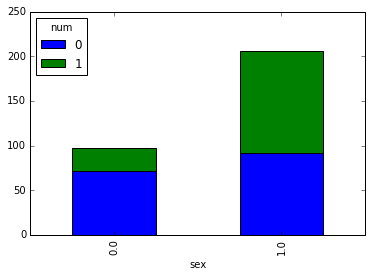

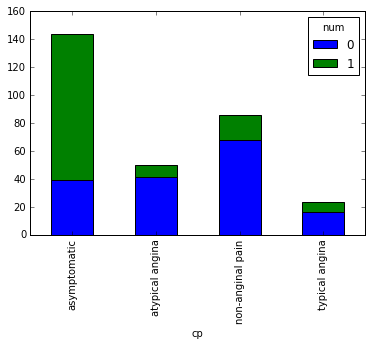

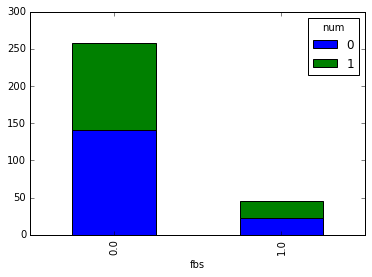

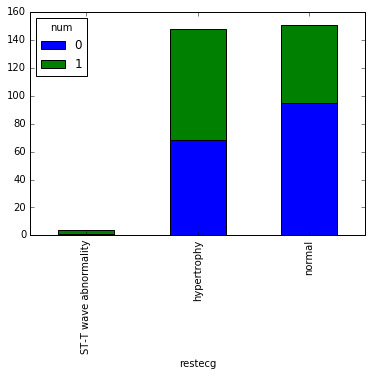

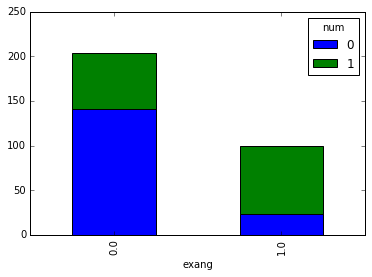

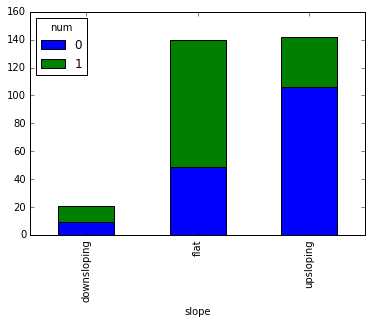

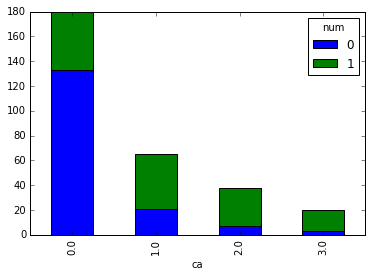

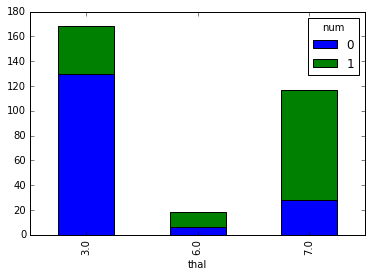

In [14]:
for col in ["sex","cp","fbs","restecg","exang","slope","ca","thal"]:
    df2 = df_data.groupby([col, 'num'])['num'].count().unstack("num")
    df2.plot(kind='bar', stacked = True)
    

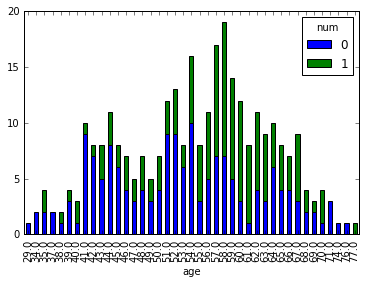

In [15]:
df2 = df_data.groupby(['age', 'num']).size().unstack('num').replace("NaN", 0)
df2.plot.bar(stacked = True)

# 1.Regression Tasks

In [16]:
# use classification accuracy, precision, recall, ROC Area, and confusion matrices. 
# Since these decision tree implementations are able to handle continuous attributes
# and missing values directly, make sure to run some experiments with no pre-processing
# and some experiments with pre-processing (discretizing continuous attributes and replacing
# missing values before hand), and compare the results.
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import time
from os import system
import graphviz 

## 1.1 Classification Tree. 
- Using Raw Data, Only replaced missing value with Mode

In [21]:
#One thing worth to notice: sklearn doesn't support dealing with missing value and string value!!!
def fitRowCT(data, depth, min_leaf):
    predictors = [x for x in data.columns if x not in ['num']]
    x_total = data[predictors]
    y_total = data['num']
    start_time = time.time()
    clf = tree.DecisionTreeClassifier(max_depth = depth, min_samples_leaf=min_leaf)
    y_pred = cross_val_predict(clf,x_total,y_total,cv=10)
    end_time = time.time()
    conf_mat = confusion_matrix(y_total, y_pred)
    accu_score = accuracy_score(y_total, y_pred)
    precis_score = precision_score(y_total, y_pred, average = None)
    reca_score = recall_score(y_total, y_pred, average = None)
    #auc_score = roc_auc_score(y_total, y_pred)
    report = classification_report(y_total, y_pred)
    time_taken = end_time - start_time
    print("Confusion Matrix:\n {}\nAccuracy Score: {}\nPrecision Score: {}\nRecall Score: {}\nAUC Score: {}\nTime Taken: {}\nClassification Report:\n {}\n"
          .format(conf_mat, accu_score, precis_score, reca_score, "Not Support", time_taken, report))
    clf.fit(x_total, y_total)
    dot_data = tree.export_graphviz(clf, out_file = None, feature_names = predictors, class_names=["0", "1", "2", "3", "4"])
    graph = graphviz.Source(dot_data) 
    importanceTable = pd.DataFrame(list(zip(predictors, clf.feature_importances_)), columns = ["features", "feature importance"])
    return {"graph": graph, "model": clf, "y_pred": y_pred, "y_total": y_total, "accu": accu_score}

In [22]:
#If we just use the preprossed data.
#The function cross_val_predict has a similar interface to cross_val_score,
#but returns, for each element in the input, the prediction that was obtained
#for that element when it was in the test set. Only cross-validation strategies
#that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).
#Check the reference: https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated


In [24]:
best_accu = 0
best_instance = None
for depth in range(1,8):
    for leaf in range(1, 20):
        temp = fitRowCT(df_dataToNumeric, depth, leaf)
        if temp["accu"] > best_accu:
            best_accu = temp["accu"]
            best_instance = temp

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.0780496597290039
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.       

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.08955764770507812
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.08325481414794922
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.06250405311584473
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.07905101776123047
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.09005856513977051
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.          0.          0.        ]
Recall Score: [ 0.93292683  0.09090909  0.          0.          0.        ]
AUC Score: Not Support
Time Taken: 0.08788895606994629
Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.93      0.69       164
          1       0.20      0.09      0.13        55
          2       0.00      0.00      0.00        36
          3       0.00      0.00      0.00        35
          4       0.00      0.00      0.00        13

avg / total       0.33      0.52      0.40       303


Confusion Matrix:
 [[153  11   0   0   0]
 [ 50   5   0   0   0]
 [ 33   3   0   0   0]
 [ 30   5   0   0   0]
 [ 12   1   0   0   0]]
Accuracy Score: 0.5214521452145214
Precision Score: [ 0.55035971  0.2         0.      

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.08605790138244629
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.07404899597167969
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.09806561470031738
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.08705782890319824
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.07304835319519043
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.07304835319519043
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.142857

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[155   1   5   3   0]
 [ 33   1   8  13   0]
 [ 16   3   4  13   0]
 [ 13   3   9  10   0]
 [  5   1   2   5   0]]
Accuracy Score: 0.5610561056105611
Precision Score: [ 0.6981982   0.11111111  0.14285714  0.22727273  0.        ]
Recall Score: [ 0.94512195  0.01818182  0.11111111  0.28571429  0.        ]
AUC Score: Not Support
Time Taken: 0.07404828071594238
Classification Report:
              precision    recall  f1-score   support

          0       0.70      0.95      0.80       164
          1       0.11      0.02      0.03        55
          2       0.14      0.11      0.12        36
          3       0.23      0.29      0.25        35
          4       0.00      0.00      0.00        13

avg / total       0.44      0.56      0.48       303


Confusion Matrix:
 [[146  11   6   1   0]
 [ 25  11  12   7   0]
 [  8  15   7   6   0]
 [  6  11  16   2   0]
 [  2   7   4   0   0]]
Accuracy Score: 0.5478547854785478
Precision Score: [ 0.78074866  0.2         0.155555

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[146  11   5   2   0]
 [ 25  11  12   7   0]
 [  7  15   8   6   0]
 [  6  11  16   2   0]
 [  2   7   4   0   0]]
Accuracy Score: 0.5511551155115512
Precision Score: [ 0.78494624  0.2         0.17777778  0.11764706  0.        ]
Recall Score: [ 0.8902439   0.2         0.22222222  0.05714286  0.        ]
AUC Score: Not Support
Time Taken: 0.08305549621582031
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.89      0.83       164
          1       0.20      0.20      0.20        55
          2       0.18      0.22      0.20        36
          3       0.12      0.06      0.08        35
          4       0.00      0.00      0.00        13

avg / total       0.50      0.55      0.52       303


Confusion Matrix:
 [[146  11   6   1   0]
 [ 25  11  12   7   0]
 [  7  14   8   7   0]
 [  6  11  16   2   0]
 [  2   7   3   1   0]]
Accuracy Score: 0.5511551155115512
Precision Score: [ 0.78494624  0.2037037   0.177777

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[149   9   5   1   0]
 [ 26  11  11   7   0]
 [  8  11  10   7   0]
 [  7  12  14   2   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5676567656765676
Precision Score: [ 0.77604167  0.2244898   0.22727273  0.11111111  0.        ]
Recall Score: [ 0.90853659  0.2         0.27777778  0.05714286  0.        ]
AUC Score: Not Support
Time Taken: 0.08606076240539551
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       164
          1       0.22      0.20      0.21        55
          2       0.23      0.28      0.25        36
          3       0.11      0.06      0.08        35
          4       0.00      0.00      0.00        13

avg / total       0.50      0.57      0.53       303


Confusion Matrix:
 [[149   9   5   1   0]
 [ 26  11  11   7   0]
 [  8  11  10   7   0]
 [  7  12  14   2   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5676567656765676
Precision Score: [ 0.77604167  0.2244898   0.227272

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[149   9   5   1   0]
 [ 26  11  11   7   0]
 [  8  11  10   7   0]
 [  7  12  14   2   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5676567656765676
Precision Score: [ 0.77604167  0.2244898   0.22727273  0.11111111  0.        ]
Recall Score: [ 0.90853659  0.2         0.27777778  0.05714286  0.        ]
AUC Score: Not Support
Time Taken: 0.0860598087310791
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       164
          1       0.22      0.20      0.21        55
          2       0.23      0.28      0.25        36
          3       0.11      0.06      0.08        35
          4       0.00      0.00      0.00        13

avg / total       0.50      0.57      0.53       303


Confusion Matrix:
 [[149  10   4   1   0]
 [ 25  12  11   7   0]
 [  7  12  10   7   0]
 [  6  13  14   2   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.570957095709571
Precision Score: [ 0.78835979  0.22641509  0.23255814

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[149   9   5   1   0]
 [ 24  12  12   7   0]
 [  8  10  11   7   0]
 [  6  13  14   2   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5742574257425742
Precision Score: [ 0.78835979  0.24        0.23913043  0.11111111  0.        ]
Recall Score: [ 0.90853659  0.21818182  0.30555556  0.05714286  0.        ]
AUC Score: Not Support
Time Taken: 0.08005666732788086
Classification Report:
              precision    recall  f1-score   support

          0       0.79      0.91      0.84       164
          1       0.24      0.22      0.23        55
          2       0.24      0.31      0.27        36
          3       0.11      0.06      0.08        35
          4       0.00      0.00      0.00        13

avg / total       0.51      0.57      0.54       303


Confusion Matrix:
 [[149   9   5   1   0]
 [ 24  12  11   8   0]
 [  8  10  11   7   0]
 [  6  13  13   3   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5775577557755776
Precision Score: [ 0.78835979  0.24        0.25    

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\y

Confusion Matrix:
 [[150   9   4   1   0]
 [ 25  12  10   8   0]
 [  9  10  10   7   0]
 [  6  13  13   3   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5775577557755776
Precision Score: [ 0.78125     0.24        0.24390244  0.15        0.        ]
Recall Score: [ 0.91463415  0.21818182  0.27777778  0.08571429  0.        ]
AUC Score: Not Support
Time Taken: 0.09005880355834961
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       164
          1       0.24      0.22      0.23        55
          2       0.24      0.28      0.26        36
          3       0.15      0.09      0.11        35
          4       0.00      0.00      0.00        13

avg / total       0.51      0.58      0.54       303


Confusion Matrix:
 [[150   9   4   1   0]
 [ 25  12  10   8   0]
 [  9  10  10   7   0]
 [  6  13  13   3   0]
 [  2   6   4   1   0]]
Accuracy Score: 0.5775577557755776
Precision Score: [ 0.78125     0.24        0.243902

C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yimin lin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
 [[147  13   4   0   0]
 [ 25  12  11   7   0]
 [  8  11  10   7   0]
 [  7  13  13   2   0]
 [  2   6   3   2   0]]
Accuracy Score: 0.5643564356435643
Precision Score: [ 0.77777778  0.21818182  0.24390244  0.11111111  0.        ]
Recall Score: [ 0.89634146  0.21818182  0.27777778  0.05714286  0.        ]
AUC Score: Not Support
Time Taken: 0.08605670928955078
Classification Report:
              precision    recall  f1-score   support

          0       0.78      0.90      0.83       164
          1       0.22      0.22      0.22        55
          2       0.24      0.28      0.26        36
          3       0.11      0.06      0.08        35
          4       0.00      0.00      0.00        13

avg / total       0.50      0.56      0.53       303


Confusion Matrix:
 [[146  13   4   1   0]
 [ 25  12  11   7   0]
 [  8  11  10   7   0]
 [  8  12  12   3   0]
 [  2   6   3   2   0]]
Accuracy Score: 0.5643564356435643
Precision Score: [ 0.77248677  0.22222222  0.25    

best accu: 0.590759075908


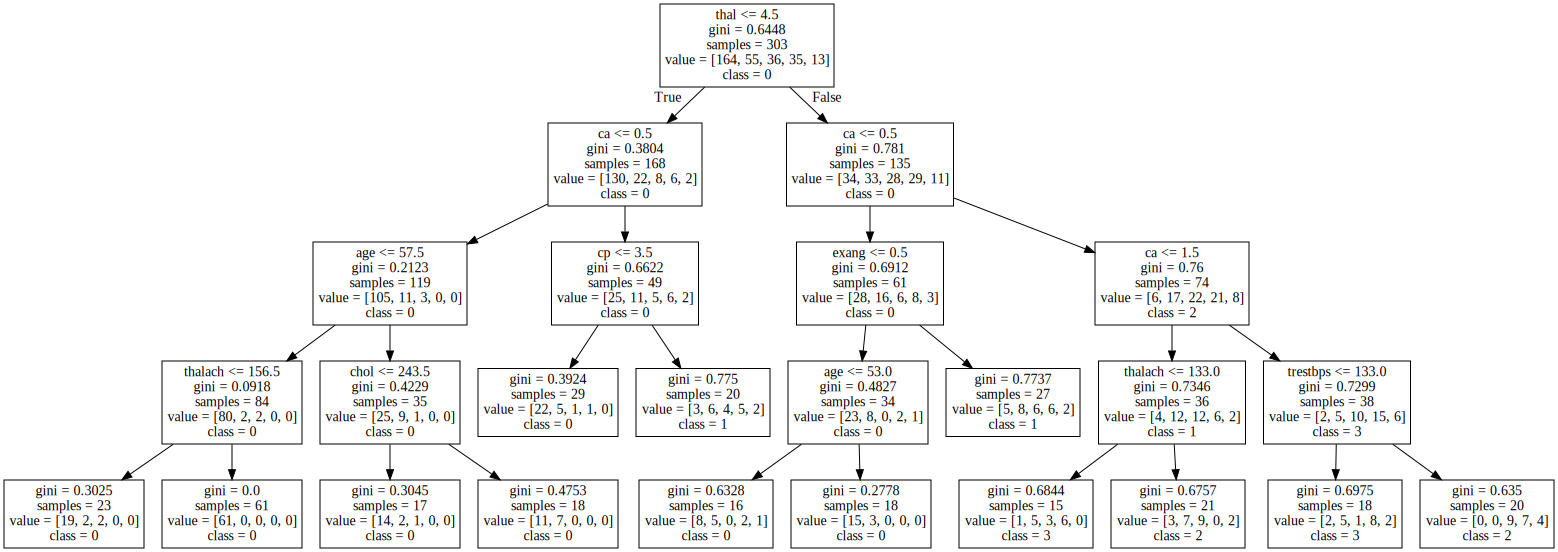

In [25]:
print("best accu:", best_instance["accu"])
best_instance["graph"]

## 1.2 Classification Tree
- Transform some features 

In [26]:
#One thing worth to notice: sklearn doesn't support dealing with missing value and string value!!!
def fitCT(data, predictor, depth, min_leaf):
    print("="*100)
    print("current depth: ", depth, "\ncurrent Min leaf", min_leaf)
    x_total = df_dataToNumeric_twoClass[predictors]
    y_total = df_dataToNumeric_twoClass['num']
    start_time = time.time()
    clf = tree.DecisionTreeClassifier(max_depth = depth, min_samples_leaf=min_leaf)
    y_pred = cross_val_predict(clf,x_total,y_total,cv=10)
    end_time = time.time()
    conf_mat = confusion_matrix(y_total, y_pred)
    accu_score = accuracy_score(y_total, y_pred)
    precis_score = precision_score(y_total, y_pred, average = None)
    reca_score = recall_score(y_total, y_pred, average = None)
    auc_score = roc_auc_score(y_total, y_pred)
    report = classification_report(y_total, y_pred)
    time_taken = end_time - start_time
    print("Confusion Matrix:\n {}\nAccuracy Score: {}\nPrecision Score: {}\nRecall Score: {}\nAUC Score: {}\nTime Taken: {}\nClassification Report:\n {}\n"
          .format(conf_mat, accu_score, precis_score, reca_score, auc_score, time_taken, report))
    clf.fit(x_total, y_total)
    importanceTable = pd.DataFrame(list(zip(predictors, clf.feature_importances_)), columns = ["features", "feature importance"])
    print(importanceTable)
    dot_data = tree.export_graphviz(clf, out_file = None, feature_names = predictors, class_names=["0", "1"])
    graph = graphviz.Source(dot_data) 
    return {"graph": graph, "model": clf, "y_pred": y_pred, "y_total": y_total, "accu": accu_score, "roc": auc_score}

In [27]:
predictors = [x for x in df_dataToNumeric_twoClass.columns if x not in ['num']]

In [29]:
print("best accu:", best_instance["accu"])

best accu: 0.821782178218


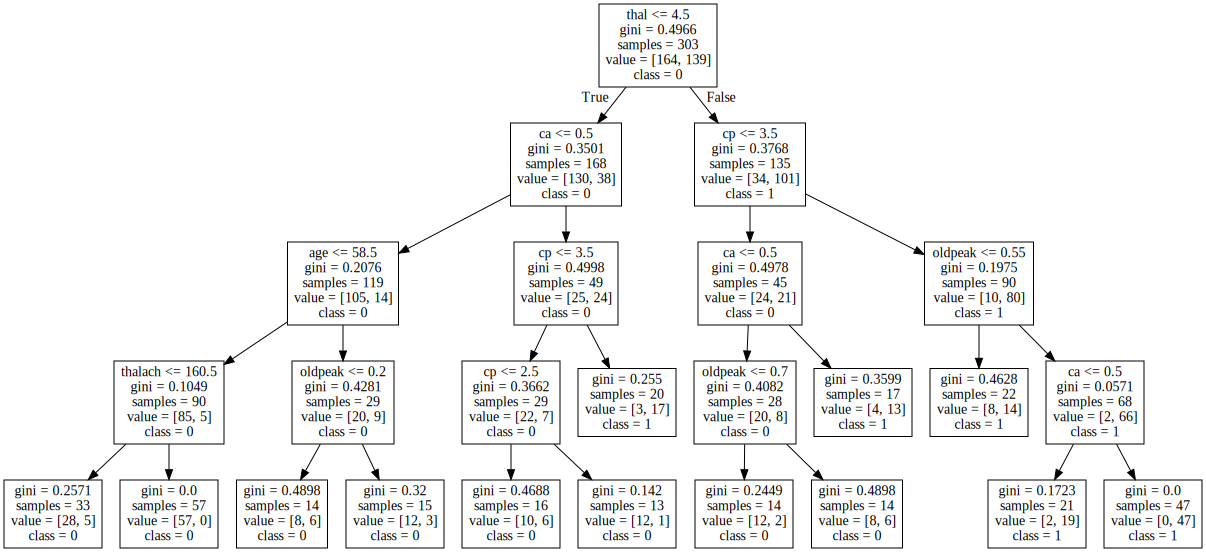

In [30]:
best_instance["graph"]

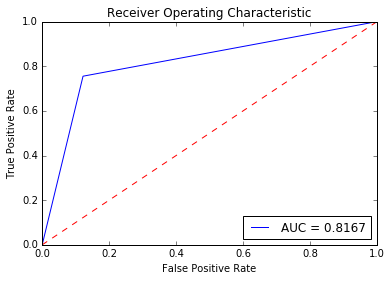

In [31]:
fpr, tpr, thresholds = roc_curve(best_instance["y_total"], best_instance["y_pred"], pos_label=1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% best_instance["roc"])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

best roc: 0.816722231971


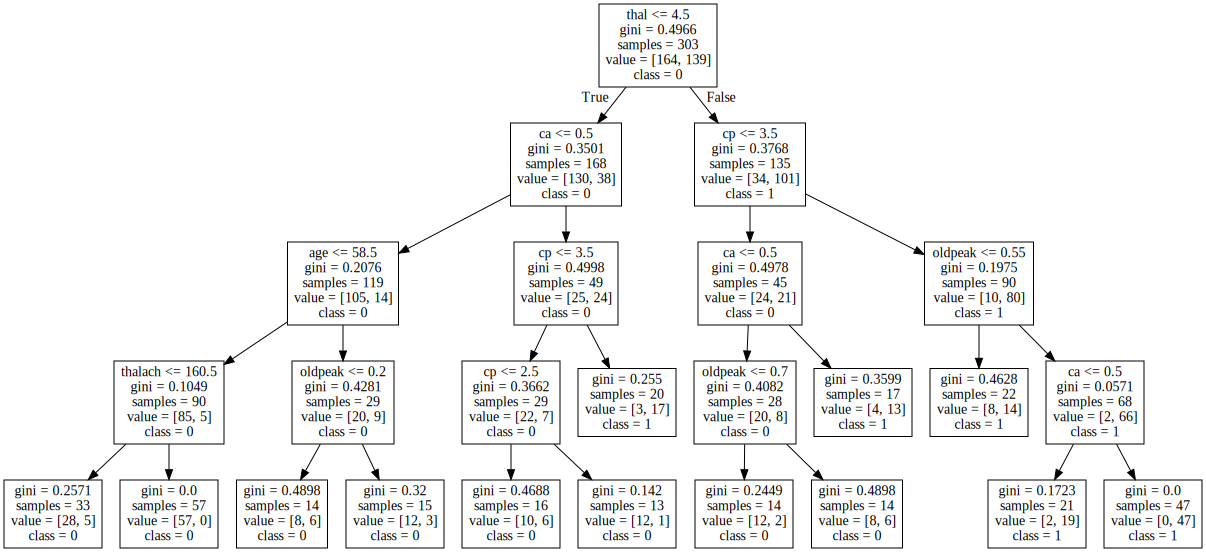

In [32]:
print("best roc:", best_instance_roc["roc"])
best_instance_roc["graph"]

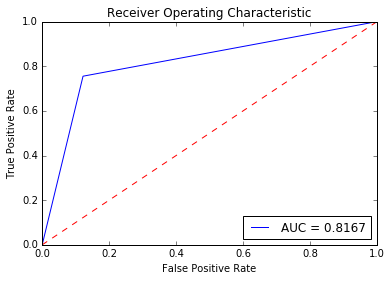

In [33]:
fpr, tpr, thresholds = roc_curve(best_instance_roc["y_total"], best_instance_roc["y_pred"], pos_label=1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% best_instance_roc["roc"])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

current depth:  2 
current Min leaf 13
Confusion Matrix:
 [[147  17]
 [ 61  78]]
Accuracy Score: 0.7425742574257426
Precision Score: [ 0.70673077  0.82105263]
Recall Score: [ 0.89634146  0.56115108]
AUC Score: 0.7287462712756624
Time Taken: 0.07805180549621582
Classification Report:
              precision    recall  f1-score   support

          0       0.71      0.90      0.79       164
          1       0.82      0.56      0.67       139

avg / total       0.76      0.74      0.73       303


    features  feature importance
0        age            0.000000
1        sex            0.000000
2         cp            0.175076
3   trestbps            0.000000
4       chol            0.000000
5        fbs            0.000000
6    restecg            0.000000
7    thalach            0.000000
8      exang            0.000000
9    oldpeak            0.000000
10     slope            0.000000
11        ca            0.157358
12      thal            0.667566


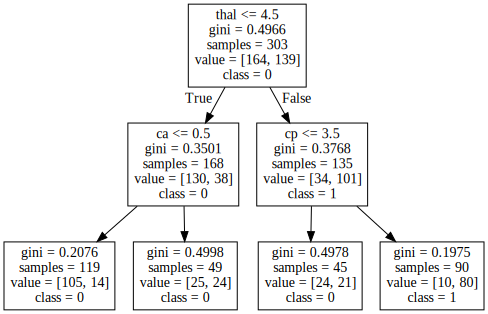

In [38]:
temp = fitCT(df_dataToNumeric_twoClass, predictors, 2, 13)
temp["graph"]

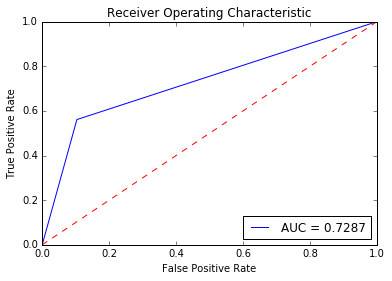

In [39]:
fpr, tpr, thresholds = roc_curve(temp["y_total"], temp["y_pred"], pos_label=1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% temp["roc"])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 1.3 ONER
### We can get the result of ONER by simply get a tree with depth = 1

In [61]:
predictors = [x for x in df_dataToNumeric_twoClass.columns if x not in ['num']]

In [62]:
temp = fitCT(df_dataToNumeric_twoClass, predictors, 1, 10)

current depth:  1 
current Min leaf 10
Confusion Matrix:
 [[123  41]
 [ 40  99]]
Accuracy Score: 0.7326732673267327
Precision Score: [ 0.75460123  0.70714286]
Recall Score: [ 0.75        0.71223022]
AUC Score: 0.7311151079136691
Time Taken: 0.08305501937866211
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.75      0.75       164
          1       0.71      0.71      0.71       139

avg / total       0.73      0.73      0.73       303


    features  feature importance
0        age                 0.0
1        sex                 0.0
2         cp                 0.0
3   trestbps                 0.0
4       chol                 0.0
5        fbs                 0.0
6    restecg                 0.0
7    thalach                 0.0
8      exang                 0.0
9    oldpeak                 0.0
10     slope                 0.0
11        ca                 0.0
12      thal                 1.0


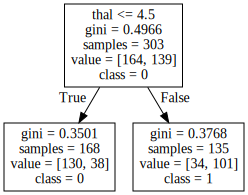

In [63]:
temp["graph"]

# 2. Regression Tasks
- Linear Regression: Weka (under "functions") and Python.
- Regression Trees: Weka (M5P under "trees") and Python.
- Model Trees: Weka (M5P under "trees") and Python.
- For regression tasks: use correlation coefficient AND any subset of the following error metrics that you find appropriate: mean-squared error, root mean-squared error, mean absolute error, relative squared error, root relative squared error, and relative absolute error. An important part of the data mining evaluation in this project is to try to make sense of these performance metrics and to become familiar with them.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import matthews_corrcoef
from scipy.stats import pearsonr
from sklearn.metrics import explained_variance_score #(y_true, y_pred)	Explained variance regression score function
from sklearn.metrics import mean_absolute_error #(y_true, y_pred)	Mean absolute error regression loss
from sklearn.metrics import mean_squared_error #(y_true, y_pred[, …])	Mean squared error regression loss
from sklearn.metrics import median_absolute_error #(y_true, y_pred)	Median absolute error regression loss
from sklearn.metrics import r2_score #(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
from sklearn.feature_selection import RFE
import math
import time
from os import system
import graphviz 

In [44]:
df_dataToNumeric

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(57.8, 62.6]      64
(53, 57.8]        52
(48.2, 53]        45
(62.6, 67.4]      43
(43.4, 48.2]      38
(38.6, 43.4]      33
(67.4, 72.2]      14
(33.8, 38.6]      10
(72.2, 77]         3
(28.952, 33.8]     1
Name: age, dtype: int64


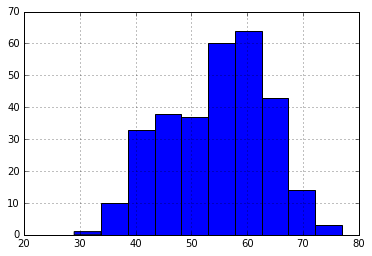

In [45]:
# Check Age Distribution
data = pd.cut(df_dataToNumeric["age"], 10)
count = pd.value_counts(data)
print(count)
df_dataToNumeric["age"].hist()

## 2.1 Linear Regression

In [46]:
def fitLR(data, predictors, normalization):
    predictors =predictors
    train, test = train_test_split(data, test_size=0.3, random_state=19, stratify=df_data['num'])
    x_total = data[predictors]
    y_total = data['age']
    start_time = time.time()
    regr = LinearRegression(normalize = normalization)
    y_pred = cross_val_predict(regr,x_total,y_total,cv=10)
    regr.fit(x_total, y_total)
    end_time = time.time()
    time_taken = end_time - start_time
    r_squre_score = r2_score(y_total, y_pred)
    meansq_error = mean_squared_error(y_total, y_pred)
    corr_coef = pearsonr(y_total, y_pred)  
    meanab_error = mean_absolute_error(y_total, y_pred)
    explained_var_score = explained_variance_score(y_total, y_pred)
    coefTable = pd.DataFrame(list(zip(predictors, regr.coef_)), columns = ["features", "estimatedCoefficients"])
    print("============================")
    print(regr.get_params)
    print("R-Square: {}\nMean Square Error: {}\nRootMeanSquareError: {}\nCorrelation Coefficient: {}\np-value: {}\nExplained Variance Score: {}\nTime Taken: {}"
         .format(r_squre_score, meansq_error, math.sqrt(meansq_error), corr_coef[0], corr_coef[1], explained_var_score, time_taken))
    print(coefTable)
    


In [47]:
def fitRFE_LR(data, n_feature):
    print("============================")
    print("Number of Feature:", n_feature)
    predictors = [x for x in data.columns if x not in ['age']]
    x_total = data[predictors]
    y_total = data['age']
    regr = LinearRegression()
    regr = RFE(regr, n_feature)
    regr.fit(x_total, y_total)
    print("Selected feature name: {}".format(data.columns[regr.support_]))
    return [n for n in data.columns[regr.support_] if n not in ["age"]]

### 2.1.1 Linear Regression With multiple classes

In [48]:
predictors =  [x for x in df_dataToNumeric.columns if x not in ['age']]

In [49]:
fitLR(df_dataToNumeric, predictors, True)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.2773473172519162
Mean Square Error: 58.84401111327709
RootMeanSquareError: 7.6709850158423
Correlation Coefficient: 0.5292634268594295
p-value: 2.835841092158113e-23
Explained Variance Score: 0.2773813037045252
Time Taken: 0.08905744552612305
    features  estimatedCoefficients
0        sex              -1.586180
1         cp              -0.318769
2   trestbps               0.110971
3       chol               0.023037
4        fbs               1.062109
5    restecg               0.440268
6    thalach              -0.147480
7      exang              -1.292361
8    oldpeak               0.090000
9      slope              -0.005512
10        ca               2.701171
11      thal               0.110086
12       num              -0.670615


In [50]:
fitLR(df_dataToNumeric, predictors,  False)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
R-Square: 0.2773473172519161
Mean Square Error: 58.844011113277105
RootMeanSquareError: 7.670985015842301
Correlation Coefficient: 0.5292634268594293
p-value: 2.8358410921583114e-23
Explained Variance Score: 0.27738130370452496
Time Taken: 0.09206008911132812
    features  estimatedCoefficients
0        sex              -1.586180
1         cp              -0.318769
2   trestbps               0.110971
3       chol               0.023037
4        fbs               1.062109
5    restecg               0.440268
6    thalach              -0.147480
7      exang              -1.292361
8    oldpeak               0.090000
9      slope              -0.005512
10        ca               2.701171
11      thal               0.110086
12       num              -0.670615


### 2.1.2 Linear Regression With two classes

In [52]:
predictors =  [x for x in df_dataToNumeric.columns if x not in ['age']]

In [53]:
fitLR(df_dataToNumeric_twoClass,predictors, True)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.28136314959107844
Mean Square Error: 58.51701075966864
RootMeanSquareError: 7.649641217708752
Correlation Coefficient: 0.5323271960720121
p-value: 1.4264463753739195e-23
Explained Variance Score: 0.2814289099503454
Time Taken: 0.09206008911132812
    features  estimatedCoefficients
0        sex              -1.629685
1         cp              -0.401998
2   trestbps               0.109872
3       chol               0.023251
4        fbs               1.059437
5    restecg               0.400027
6    thalach              -0.146096
7      exang              -1.370228
8    oldpeak              -0.014194
9      slope              -0.076470
10        ca               2.511531
11      thal               0.057634
12       num              -0.630337


In [54]:
fitLR(df_dataToNumeric_twoClass,predictors, False)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
R-Square: 0.28136314959107855
Mean Square Error: 58.51701075966863
RootMeanSquareError: 7.649641217708751
Correlation Coefficient: 0.5323271960720123
p-value: 1.4264463753738528e-23
Explained Variance Score: 0.28142890995034575
Time Taken: 0.09206175804138184
    features  estimatedCoefficients
0        sex              -1.629685
1         cp              -0.401998
2   trestbps               0.109872
3       chol               0.023251
4        fbs               1.059437
5    restecg               0.400027
6    thalach              -0.146096
7      exang              -1.370228
8    oldpeak              -0.014194
9      slope              -0.076470
10        ca               2.511531
11      thal               0.057634
12       num              -0.630337


In [55]:
for i in range(1,15):
    predictors = fitRFE_LR(df_dataToNumeric_twoClass, i)
    fitLR(df_dataToNumeric_twoClass, predictors,  True)

Number of Feature: 1
Selected feature name: Index(['slope'], dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.01677881730987152
Mean Square Error: 80.06152828632916
RootMeanSquareError: 8.947710784682815
Correlation Coefficient: 0.13305603668550345
p-value: 0.020512993931261818
Explained Variance Score: 0.016778836170081135
Time Taken: 0.06704354286193848
  features  estimatedCoefficients
0    slope               2.372798
Number of Feature: 2
Selected feature name: Index(['age', 'slope'], dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.01677881730987152
Mean Square Error: 80.06152828632916
RootMeanSquareError: 8.947710784682815
Correlation Coefficient: 0.13305603668550345
p-value: 0.020512993931261818
Explained Variance Score: 0.016778836170081135
Time Taken: 0.053961992263793945
  features  

C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin l

Selected feature name: Index(['age', 'slope', 'thal'], dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.017040209365577375
Mean Square Error: 80.04024370883008
RootMeanSquareError: 8.94652131886076
Correlation Coefficient: 0.138042897130683
p-value: 0.016195101400578834
Explained Variance Score: 0.01704022619872403
Time Taken: 0.0790548324584961
  features  estimatedCoefficients
0    slope               1.997362
1     thal               0.416170
Number of Feature: 4
Selected feature name: Index(['age', 'chol', 'slope', 'thal'], dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.050559585507792715
Mean Square Error: 77.31083497720815
RootMeanSquareError: 8.792658015481333
Correlation Coefficient: 0.22994678002715038
p-value: 5.3362912237919395e-05
Explained Variance Score: 0.05056541432299355
Tim

C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)


<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.19370058242524757
Mean Square Error: 65.65517989633919
RootMeanSquareError: 8.102788402540153
Correlation Coefficient: 0.4408095208408162
p-value: 7.768290478757334e-16
Explained Variance Score: 0.19371405680296194
Time Taken: 0.09909725189208984
  features  estimatedCoefficients
0      sex              -2.030418
1     chol               0.032211
2      fbs               2.931306
3  thalach              -0.151850
4    slope              -0.057117
5     thal               0.247913
Number of Feature: 8
Selected feature name: Index(['age', 'sex', 'chol', 'fbs', 'restecg', 'thalach', 'slope', 'thal'], dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.1924275144351607
Mean Square Error: 65.75884300967846
RootMeanSquareError: 8.109182635116714
Correlation Coefficient:

C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)


<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.19279543592181847
Mean Square Error: 65.72888397601463
RootMeanSquareError: 8.107335195735688
Correlation Coefficient: 0.4411283115119465
p-value: 7.365613730804395e-16
Explained Variance Score: 0.19283217185294366
Time Taken: 0.10089874267578125
  features  estimatedCoefficients
0      sex              -2.285177
1       cp              -0.584876
2     chol               0.029251
3      fbs               2.809147
4  restecg               0.754573
5  thalach              -0.153322
6  oldpeak               0.727043
7    slope              -0.897510
8     thal               0.263439
Number of Feature: 11
Selected feature name: Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normali

C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)
C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)


Selected feature name: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)>
R-Square: 0.2829917265991957
Mean Square Error: 58.38439933255811
RootMeanSquareError: 7.640968481322123
Correlation Coefficient: 0.5336559278800675
p-value: 1.0565335378151215e-23
Explained Variance Score: 0.2830728122595998
Time Taken: 0.09706401824951172
    features  estimatedCoefficients
0        sex              -1.725903
1         cp              -0.457865
2   trestbps               0.108647
3       chol               0.023045
4        fbs               1.105529
5    restecg               0.380230
6    thalach              -0.144670
7      exang              -1.465440
8    oldpeak              -0.034683
9      slope              -0.117951
10        ca               2.424434
11      thal       

C:\Users\yimin lin\Anaconda3\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)


#### Reference:
http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

## 2.2 Regression Tree  --- Multiple Classes


In [56]:
def fitRT(data, predictors, depth, min_split):
    print("="*100)
    print("Depth", depth)
    print("min_split", min_split)
    print("predictors",predictors)
    predictors = predictors
    x_total = data[predictors]
    y_total = data['age']
    start_time = time.time()
    clf = DecisionTreeRegressor(max_depth = depth, min_samples_split = min_split)
    y_pred = cross_val_predict(clf,x_total,y_total,cv=10)
    clf.fit(x_total, y_total)
    end_time = time.time()
    time_taken = end_time - start_time
    r_squre_score = r2_score(y_total, y_pred)
    meansq_error = mean_squared_error(y_total, y_pred)
    corr_coef = pearsonr(y_total, y_pred)  
    meanab_error = mean_absolute_error(y_total, y_pred)
    explained_var_score = explained_variance_score(y_total, y_pred)
    print("R-Square: {}\nMean Square Error: {}\nRootMeanSquareError: {}\nCorrelation Coefficient: {}\np-value: {}\nExplained Variance Score: {}\nTime Taken: {}"
         .format(r_squre_score, meansq_error, math.sqrt(meansq_error), corr_coef[0], corr_coef[1], explained_var_score, time_taken))
    dot_data = tree.export_graphviz(clf, out_file = None, feature_names = predictors)
    graph = graphviz.Source(dot_data) 
    return [graph, r_squre_score, meansq_error]

### 2.2.1 Without Feature Selection

In [57]:
predictors = [x for x in df_dataToNumeric.columns if x not in ['age']]

Best R Square:0.2159271955834815
Best MSE:63.84531590092722


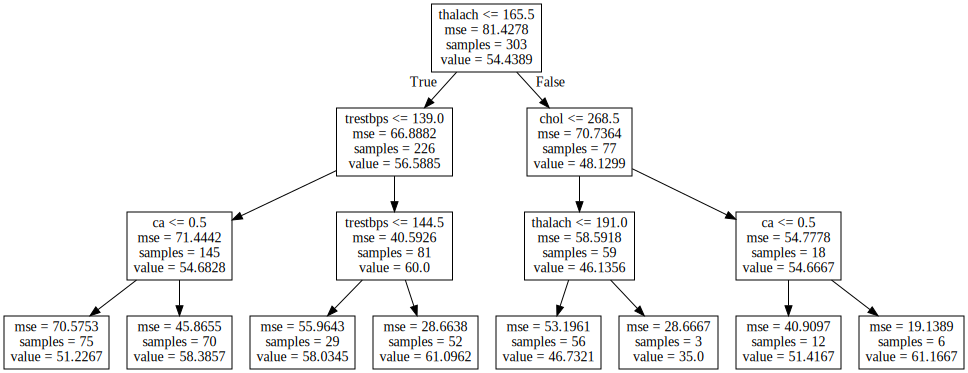

In [59]:
print("Best R Square:{}".format(best_instance[1]))
print("Best MSE:{}".format(best_instance[2]))
best_instance[0]

### 2.2.2 With Feature Selection

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

## 2.3 Regression Tree--Two Classes

In [60]:
fitRT(df_dataToNumeric_twoClass)

TypeError: fitRT() missing 3 required positional arguments: 'predictors', 'depth', and 'min_split'